In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt#%matplotlib inline for inline plotting
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)#setting default size of plots

In [2]:
df1 = pd.read_csv("C:/Users/hp/OneDrive/Documents/Pictures/Desktop/BHP/model/Bengaluru_House_Data.csv",encoding="utf-8")

In [3]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.groupby('area_type')['area_type'].agg('count')#counting the number of area types

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df2 = df1.drop(['area_type','balcony','availability','society'],axis='columns')# droping the unnecesaary clms

In [8]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.isnull().sum()# checking the null value count

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3 = df2.dropna()      # droping the null values
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 5)

In [12]:
df3['size'].unique()# checking the unique values in size clm

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))# creating a new clm bhk and assigning the bhk value by spliting the size clm

C:\Users\hp\AppData\Local\Temp\ipykernel_18348\2217765445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))# creating a new clm bhk and assigning the bhk value by spliting the size clm


In [14]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [16]:
df3[df3.bhk>20]# checking the data where bhk is greater than 20

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df3.total_sqft.unique()# checking the unique values in total_sqft clm

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x): # defining a function
    try:             # try for converting the value to float
        float(x)
    except:           # if the value cannot be converted to float
        return False  
    return True     # if the value can be converted to float

In [19]:
df3[~df3['total_sqft'].apply(is_float)].head(10) # ~ is used for negating the condition

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
def convert_sqft_to_num(x):# Function to convert range into mean
    tokens = x.split('-')# Splits the range,tokens used  for splitting  
        return (float(tokens[0])+float(tokens[1]))/2 # Returns the mean of the range
    try:     # Checks if the range has only one value
        return float(x)     # Returns the value
    except:       # If the range has only one value
        return None          # Returns None if the value cannot be converted to float

IndentationError: unexpected indent (1865755794.py, line 3)

In [ ]:
convert_sqft_to_num('2166')# Function to convert range into mean

2166.0

In [ ]:
convert_sqft_to_num('2100 - 2850')# Function to convert range into mean

2475.0

In [ ]:
convert_sqft_to_num('34.46Sq. Meter')# Function to convert range into mean

In [ ]:
df4 = df3.copy()

In [ ]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num) # applying the function to total_sqft clm to convert the range into mean

In [ ]:
df4.head(6)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2


In [ ]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [ ]:
(2100+2850)/2   # calculating the mean of the range 2100-2850

2475.0

In [ ]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [ ]:
df5=df4.copy()

In [ ]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']    # creating a new clm price_per_sqft by dividing the price with total_sqft and multiplying by 100000 to convert the price into lakhs
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [ ]:
df5.location.unique()# Unique locations

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
len(df5.location.unique())# Number of unique locations

1304

In [ ]:
df5.location = df5.location.apply(lambda x : x.strip())# Strips leading and trailing spaces

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)# Counts the number of records in each location
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [ ]:
len(location_stats[location_stats<=10]) #number of locations with less than 10 records in them in the dataset

1052

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]# Selects locations with less than 10 records
location_stats_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [ ]:
len(df5.location.unique())#number of unique locations before replacement

1293

In [ ]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)#replacing less than 10 locations with 'other'
len(df5.location.unique())#number of unique locations

242

In [ ]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [ ]:
df5[df5.total_sqft/df5.bhk<300].head()#check for outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [ ]:
df5.shape

(13246, 7)

In [ ]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]#removing outliers using the condition total_sqft/bhk<300
df6.shape

(12502, 7)

In [ ]:
df6.price_per_sqft.describe() 

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):   # defining a function to remove outliers based on price_per_sqft
    df_out = pd.DataFrame()        # creating an empty dataframe to store the outliers removed data
    for key, subdf in df.groupby('location'):    # grouping the data by location and iterating through each location
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]  # means that we are keeping the data points which are within one standard deviation from the means Outlier Removal
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)#concatenating the reduced dataframe to the empty dataframe
    return df_out
df7 = remove_pps_outliers(df6)  #removing outliers based on price_per_sqft
df7.shape

(10241, 7)

In [ ]:
#This function visualizes a scatter plot comparing 2-BHK and 3-BHK house prices
# versus total square footage for a selected location.
def  plot_scatter_chart(df,location):
     bhk2 = df[(df.location == location) & (df.bhk == 2)]
     bhk3 = df[(df.location == location) & (df.bhk == 3)]
     matplotlib.rcParams['figure.figsize'] = (15,10)
     plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
     plt.scatter(bhk3.total_sqft, bhk3.price, marker='+',color = 'green', label = '3 BHK', s = 50)
     plt.xlabel("Total Square feet Area")
     plt.ylabel("Price")
     plt.title(location)
     plt.legend()
     plt.show()


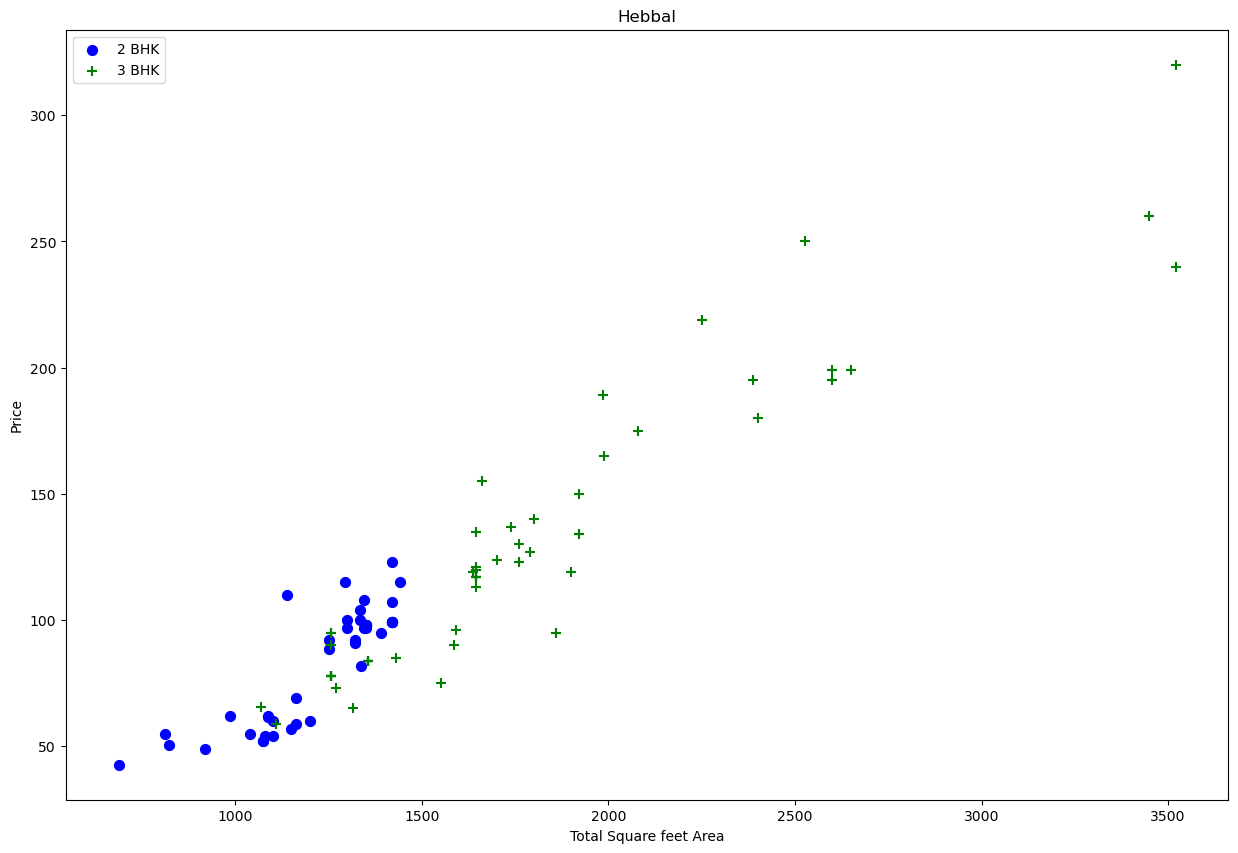

In [ ]:
plot_scatter_chart(df7,"Hebbal")

In [ ]:
#We remove illogical BHK price outliers location-wise to improve data quality and prediction performance.
#because 3 BHK should NOT be cheaper per sqft than 2 BHK in the same area
def remove_bhk_outliers(df): 
    exclude_indices = np.array([])#empty array
    for location, location_df in df.groupby('location'):#grouping by location
        bhk_stats = {}#empty dictionary
        for bhk, bhk_df in location_df.groupby('bhk'):#grouping by bhk
            bhk_stats[bhk] = {#creating a dictionary
                'mean': np.mean(bhk_df.price_per_sqft),#mean of price per sqft
                'std': np.std(bhk_df.price_per_sqft),#standard deviation
                'count': bhk_df.shape[0]#count
            }
        for bhk, bhk_df in location_df.groupby('bhk'):#grouping by bhk
            stats = bhk_stats.get(bhk-1)#get the stats of bhk-1
            if stats and stats['count']>5:#if count is greater than 5
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)#append the indices
    return df.drop(exclude_indices,axis='index')#drop the indices

In [ ]:
df8 = remove_bhk_outliers(df7)
df7.shape

(10241, 7)

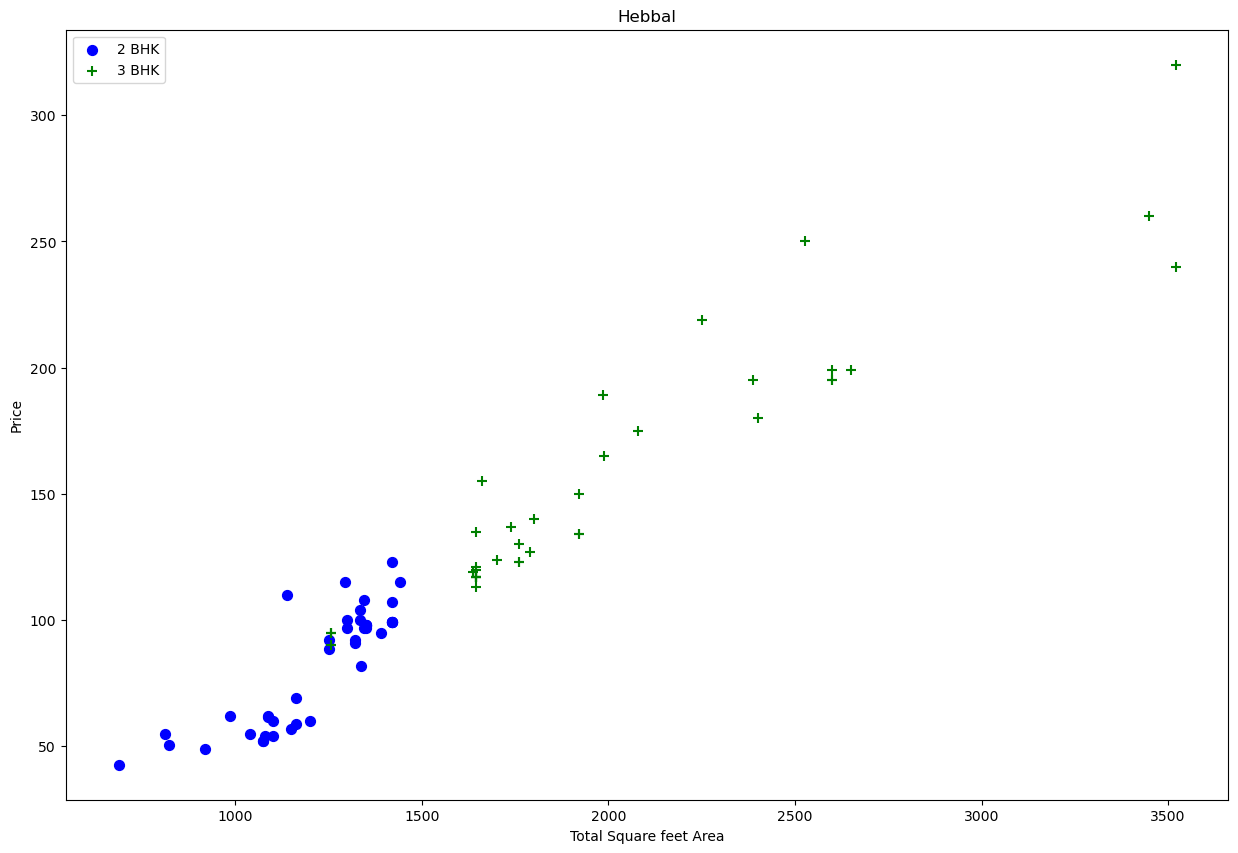

In [ ]:
def  plot_scatter_chart(df,location):
     bhk2 = df[(df.location == location) & (df.bhk == 2)]
     bhk3 = df[(df.location == location) & (df.bhk == 3)]
     matplotlib.rcParams['figure.figsize'] = (15,10)
     plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
     plt.scatter(bhk3.total_sqft, bhk3.price, marker='+',color = 'green', label = '3 BHK', s = 50)
     plt.xlabel("Total Square feet Area")
     plt.ylabel("Price")
     plt.title(location)
     plt.legend()
     plt.show()
     
plot_scatter_chart(df8,"Hebbal")


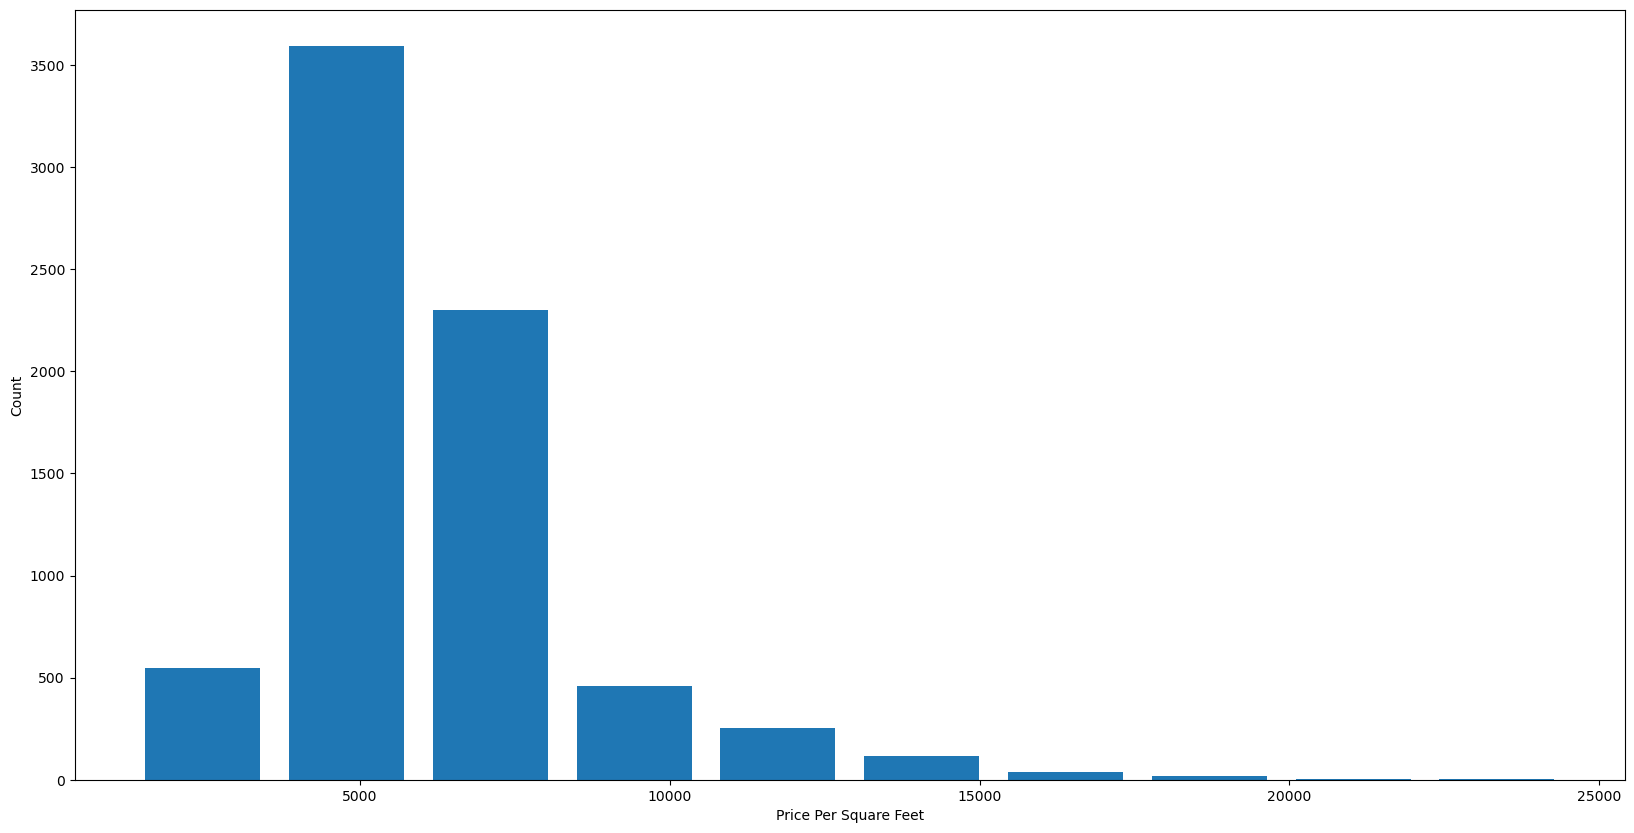

In [ ]:
#It shows how price per sqft values are distributed across the dataset.
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

In [ ]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


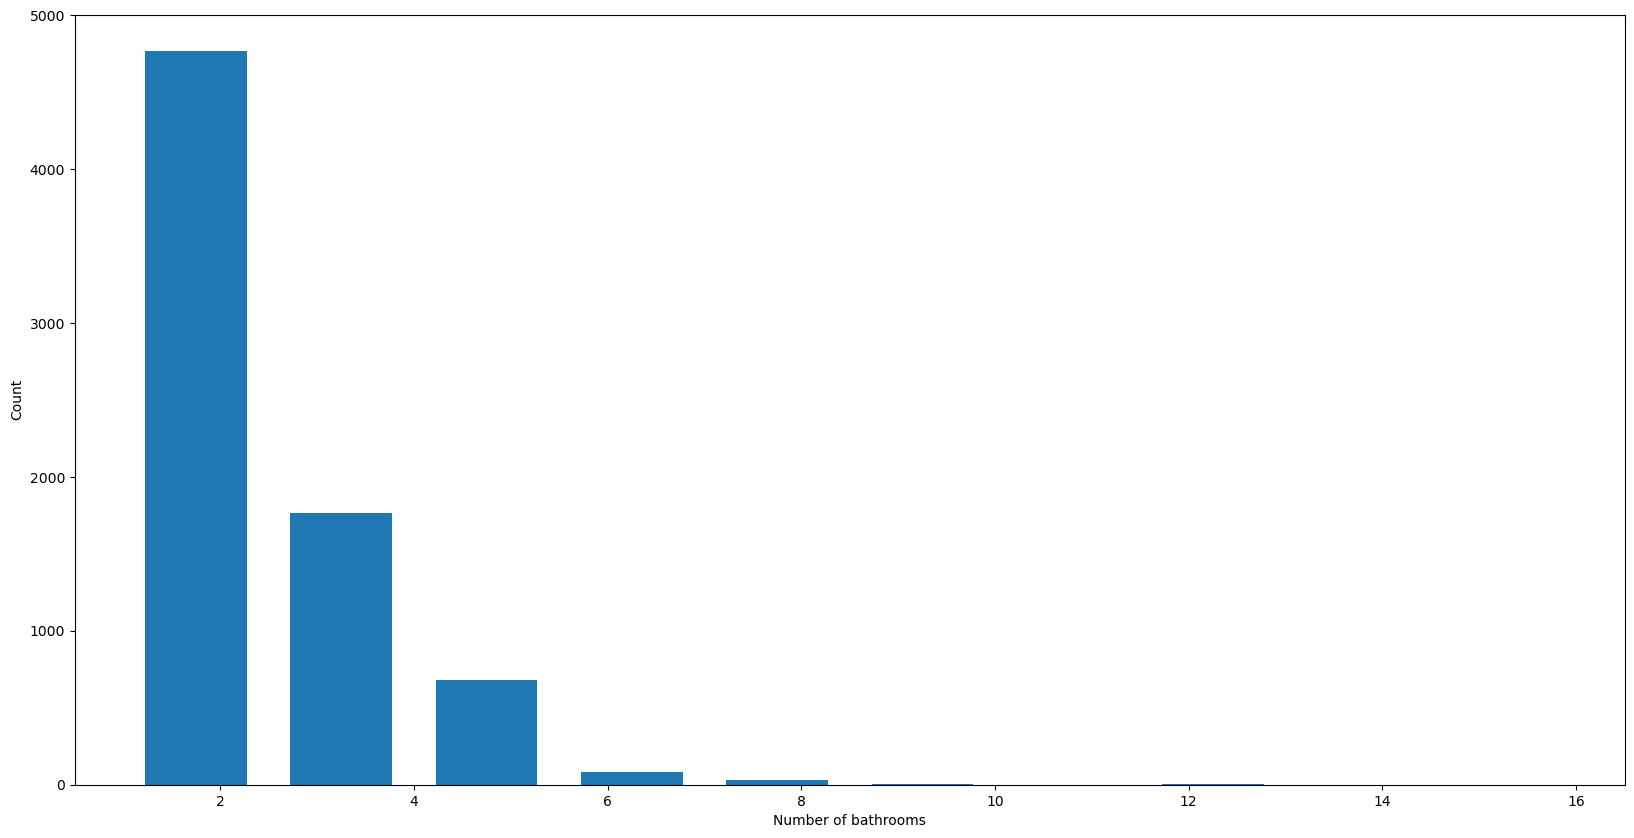

In [ ]:
#it visualizes bathroom count distribution to identify patterns and anomalies
plt.hist(df8.bath,rwidth=0.7)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [ ]:
df8[df8.bath>df8.bhk+2]#bathrooms more than bhk+2 are outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
#We filter illogical bathroom counts to improve data quality.
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [ ]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')#dropping size and price_per_sqft
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [ ]:
#We one-hot encode location to make it model-ready.
dummies = pd.get_dummies(df10.location).astype(int)

In [ ]:
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#We merge dummy variables into the dataset and drop one column to avoid multicollinearity(independent variables are highly correlated)
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12.shape

(7251, 245)

In [ ]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)


LinearRegression()

In [ ]:
lr_clf.score(X_test,y_test)

0.8452277697874324

In [ ]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score
#We use cross-validation to check model stability and generalization.
cv = ShuffleSplit(n_splits = 5,test_size = 0.2 ,random_state = 0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [ ]:
from sklearn.pipeline import Pipeline#pipelining for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


In [ ]:
def find_best_model_using_gridsearchcv(X, y):#defining a function
    algos = {#defining a dictionary
        'linear_regression': {#defining a nested dictionary
            'model': Pipeline([#pipelining for data preprocessing
                ('scaler', StandardScaler()),#data preprocessing using standard scaler
                ('lr', LinearRegression())#linear regression model
            ]),
            'params': {#defining hyperparameters for linear regression model
                'lr__fit_intercept': [True, False],#fitting the intercept for linear regression
                'lr__positive': [True, False]#fitting the intercept for linear regression
            }
        },

        'lasso': {#defining a nested dictionary for lasso
            'model': Pipeline([
                ('scaler', StandardScaler()),#data preprocessing using standard scaler
                ('lasso', Lasso())
            ]),
            'params': {
                'lasso__alpha': [0.01, 0.1, 1, 10]#defining hyperparameters for lasso
            }
        },

       
        'decision_tree': {#defining a nested dictionary
            'model': DecisionTreeRegressor(random_state=42),#decision tree
            'params': {
                'max_depth': [None, 5, 10, 20],#defining hyperparameters as max depthfor decision tree
                'min_samples_split': [2, 5, 10],#defining hyperparameters
                'min_samples_leaf': [1, 2, 4]#defining hyperparameters
            }
        }
    }

    scores = []#defining an empty list

    for algo_name, config in algos.items():#iterating through the dictionary
        gs = GridSearchCV(
            config['model'],
            config['params'],
            cv=5,#cross validation
            return_train_score=False#returning train score
        )
        gs.fit(X, y)#fitting the model for each algorithm

        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores)#returning the dataframe


In [ ]:
find_best_model_using_gridsearchcv(X,y)#calling the function

,model,best_score,best_params
0,linear_regression,0.575629,"{'lr__fit_intercept': True, 'lr__positive': Fa..."
1,lasso,0.667908,{'lasso__alpha': 1}
2,decision_tree,0.646903,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."


In [ ]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [ ]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000 ,2,2)  

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(83.49904677185246)

In [ ]:
predict_price('1st Phase JP Nagar',1000 ,3,3)  

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(86.80519395211893)

In [ ]:
predict_price('Vishwapriya Layout',1000 ,2,2)  

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(45.360844523447085)

In [ ]:
predict_price('Indira Nagar',1000 ,3,3)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(184.58430202033406)

In [ ]:
predict_price('Koramangala',1000 ,3,3)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(138.8626039189205)

In [ ]:
import pickle
with open('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))